# X-ray Luminosity - Temperature Relation

In this notebook we make a simple comparison of X-ray luminosities and temperatures to literature. The luminosities and temperatures have been measured during the course of this work. Our data are such that it is not particularly helpful to fit our own scaling relation, but we can overplot them on top of previously measured X-ray luminosity to temperature scaling relations.

## Import Statements

In [6]:
import numpy as np
from astropy.units import Quantity
import pandas as pd

from xga.products.relation import ScalingRelation
from xga.relations.clusters.LT import xcs_sdss_r500_52
from xga.models.misc import power_law
from xga.utils import DEFAULT_COSMO

## Loading data table

We load our measurements of X-ray properties. We choose the 'standard mode' pipeline run (luminosities are broadly consistent with other modes for this sample), with measurements made within $R_{500}$ (as were those of the scaling relations we compare to):

In [2]:
xray_prop = pd.read_csv("../../outputs/results/ltr_r500_pipeline_results.csv")
xray_prop

,name,ra,dec,redshift,r500,Tx500,Tx500-,Tx500+,Lx500_0.5-2.0,Lx500_0.5-2.0-,...,Lx500_0.01-100.0+,Tx500ce,Tx500ce-,Tx500ce+,Lx500ce_0.5-2.0,Lx500ce_0.5-2.0-,Lx500ce_0.5-2.0+,Lx500ce_0.01-100.0,Lx500ce_0.01-100.0-,Lx500ce_0.01-100.0+
0,25124,243.629055,26.730240,0.186,894.328175,4.09508,0.336509,0.428803,7.160965e+43,1.654052e+42,...,1.248581e+43,4.089550,0.541060,0.776698,4.365940e+43,1.182220e+42,1.034055e+42,1.295826e+44,1.153971e+43,1.158880e+43
1,44739,229.793620,28.331750,0.118,420.327709,1.01750,0.070825,0.086338,2.087752e+42,2.763224e+41,...,4.755757e+41,0.997597,0.086556,0.089026,1.703969e+42,2.508437e+41,1.974190e+41,2.946334e+42,2.406044e+41,5.992094e+41
2,19670A,150.256710,50.793942,0.134,471.746417,1.19978,0.119322,0.137150,1.473682e+42,2.794262e+41,...,7.943540e+41,1.278810,0.143419,0.158449,1.122548e+42,3.063895e+41,2.630961e+41,2.168193e+42,2.788445e+41,8.557280e+41
3,19670B,150.214920,50.805014,0.134,535.987637,1.57037,0.163560,0.225675,3.781171e+42,4.659777e+41,...,1.212557e+42,1.540700,0.177902,0.232237,3.274214e+42,3.825586e+41,2.633952e+41,6.766424e+42,7.349113e+41,1.161753e+42
4,12833,129.496800,44.248700,0.145,491.088940,1.37449,0.091825,0.103582,3.462101e+42,3.938930e+41,...,9.162024e+41,1.412940,0.131396,0.193668,2.240856e+42,2.757205e+41,3.609433e+41,4.495442e+42,8.299008e+41,7.554535e+41
5,44858,230.112000,28.887750,0.127,621.787069,2.07963,0.127336,0.173356,2.181280e+43,9.676633e+41,...,3.430648e+42,1.974800,0.137603,0.181453,1.546781e+43,9.979022e+41,6.827373e+41,3.457737e+43,2.669997e+42,2.986686e+42
6,PHL1811,328.769920,-9.588805,0.077,567.682822,1.66376,0.063290,0.063418,7.779805e+42,4.102416e+41,...,1.015352e+42,1.667990,0.090055,0.104340,5.006875e+42,3.197985e+41,2.995331e+41,1.125824e+43,9.642434e+41,1.137265e+42
7,50433,157.758000,30.862000,0.136,476.228525,1.26351,0.083351,0.094711,2.471845e+42,5.537633e+41,...,9.199127e+41,1.282590,0.111653,0.135354,1.759042e+42,4.224844e+41,3.402023e+41,3.404955e+42,5.223562e+41,1.094591e+42


## Comparing to scaling relations

Here we compare our measurements to existing scaling relations between X-ray luminosity and temperature. The selected scaling relations were not necessarily measured specifically for galaxy groups.

### Reading out data points

We need to get the data points ready for over-plotting on the scaling relations. This involves reading them out of the data table and putting them in astropy quantities. We make sure to multiply the luminosity with the inverse E(z) factor calculated from the cluster redshifts.

In [8]:
inv_e = DEFAULT_COSMO.inv_efunc(xray_prop['redshift'].values)
lx = Quantity(xray_prop[['Lx500_0.5-2.0', 'Lx500_0.5-2.0-', 'Lx500_0.5-2.0+']].values, 
              'erg/s')*inv_e[..., None]

tx = Quantity(xray_prop[['Tx500', 'Tx500-', 'Tx500+']].values, 'keV')

### XCS cluster relation OR WHATEVER

This relation was measured by [Giles et al. 2022](https://ui.adsabs.harvard.edu/abs/2022MNRAS.516.3878G/abstract), and a version is built into XGA. We trick the existing relation somewhat by adding data points, for the sake of convenience. This relation was not measured specifically from a galaxy group sample, and as such may not make for a perfect comparison (some results indicate somewhat different relations for galaxy groups and clusters). It is still a reasonable place to start however:

**NOTE TO SELF NEED TO UPDATE TO FINAL RELATION**

In [26]:
xcs_sdss_r500_52._y_data = lx[:, 0]
xcs_sdss_r500_52._y_err = lx[:, 1]

xcs_sdss_r500_52._x_data = tx[:, 0]
xcs_sdss_r500_52._x_err = tx[:, 1]

xcs_sdss_r500_52._point_names = xray_prop['name'].values

xcs_sdss_r500_52._x_name = r"$T_{\rm{X,500}}$"
xcs_sdss_r500_52._y_name = r"$E(z)^{-1}L^{0.5-2.0}_{\rm{X,500}}$"
xcs_sdss_r500_52.model_colour = 'darkcyan'

## Plotting our data

Here we make use of the scaling relation objects that we just defined to illustrate how our data compare to the literature relations.

### Labelling our data points for context

First of all, we plot the SDSSRM-XCS scaling relation with data points labelled - so it is easy to link particular points to particular groups/clusters:

In [15]:
xcs_sdss_r500_52.point_names

array(['25124', '44739', '19670A', '19670B', '12833', '44858', 'PHL1811',
       '50433'], dtype=object)

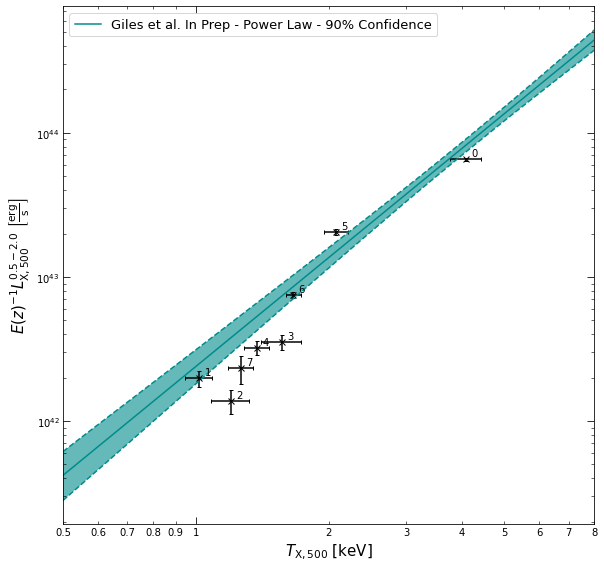

In [27]:
xcs_sdss_r500_52.view(x_lims=Quantity([0.5, 8], 'keV'), log_scale=True, label_points=True, conf_level=90, 
              plot_title='', figsize=(8.5, 8))

### Comparing data to the relation without labels

This not only plots the scaling relation, but also overlays our data points. The plot is displayed in the notebook and also saved to disk:

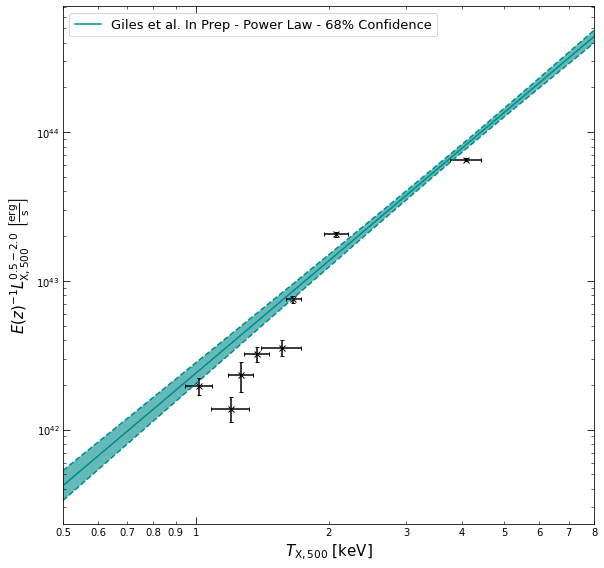

In [30]:
# # We redefine the author to trick the automatic visualisation maker into making better labels - this will
# #  be less cheesy in a future version of XGA
# xxl_lsig.author = 'XGA'
# gama_lsig.author = 'XGA'
# (xxl_lsig + gama_lsig).view(x_lims=Quantity([300, 950], 'km/s'), data_colour_list=['black', 'none'], 
#                             data_shape_list=['d', 'x'], conf_level=68, figsize=(8.2, 8), plot_title="", 
#                             save_path="../../outputs/figures/xxl_gama_veldisp_lx_comp.pdf")
# xxl_lsig.author = 'Giles et al.'
# gama_lsig.author = 'Giles et al.'

xcs_sdss_r500_52.view(x_lims=Quantity([0.5, 8], 'keV'), log_scale=True, label_points=False, conf_level=68, 
              plot_title='', figsize=(8.5, 8), save_path="../../outputs/figures/tx_lx_relation_comp.pdf")